In [2]:
import csv
import pandas as pd

In [3]:
file_path='../analysis/musicDouban250.csv'

In [4]:
album_names = []
album_links = []
album_ratings = []
rating_counts = []
artists = []
release_dates = []
types = []
media = []
genres = []

with open(file_path, 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        album_names.append(row['专辑名称'])
        album_links.append(row['专辑链接'])
        album_ratings.append(float(row['专辑评分']))
        rating_counts.append(int(row['评分人数']))
        artists.append(row['歌手'])
        release_dates.append(row['发行日期'])
        types.append(row['类型'])
        media.append(row['介质'])
        genres.append(row['曲风'])

## Display information for the top 20 highest-rated albums.

In [5]:
df = pd.read_csv(file_path, encoding='utf-8')
df = df.drop(df.columns[[0, 2]], axis=1)
df = df.sort_values(by=df.columns[1], ascending=False)
df.head(20)

,专辑名称,专辑评分,评分人数,歌手,发行日期,类型,介质,曲风
176,天空の城ラピュタ サウンドトラック 飛行石の謎 天空之城 原声碟,9.6,26816,"久石譲(Joe Hisaishi),杉並児童合唱団,井上杏美",1993-12-21,Soundtrack,Audio CD,原声
127,理性与感性 作品音乐会 Sense and Sensibility,9.6,28530,李宗盛 Jonathan,2007-09-28,专辑,CD,流行
93,MTV Unplugged in New York,9.6,34952,Nirvana,1994-11-01,Live,Audio CD,摇滚
208,Let It Be,9.5,26518,The Beatles,1990-10-25,Enhanced,Audio CD,摇滚
57,菊次郎の夏 Kikujiro (1999 Film),9.5,50228,Joe Hisaishi,1999-05-19,专辑,CD,原声
172,Yellow 黄色,9.5,37847,Coldplay,2000-07-03,EP,Audio CD,摇滚
62,Les Choristes 放牛班的春天,9.5,38052,Bruno Coulais,2004-05-03,Soundtrack,Audio CD,原声
137,Someone Like You,9.5,41329,Adele,2011-01-24,单曲,数字(Digital),放克/灵歌/R&B
139,The Dark Side of the Moon,9.5,48776,Pink Floyd,1973,专辑,黑胶,摇滚
177,新长征路上的摇滚,9.5,33225,崔健,1989,专辑,CD,摇滚


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Display information for the top 20 artists with most albums.

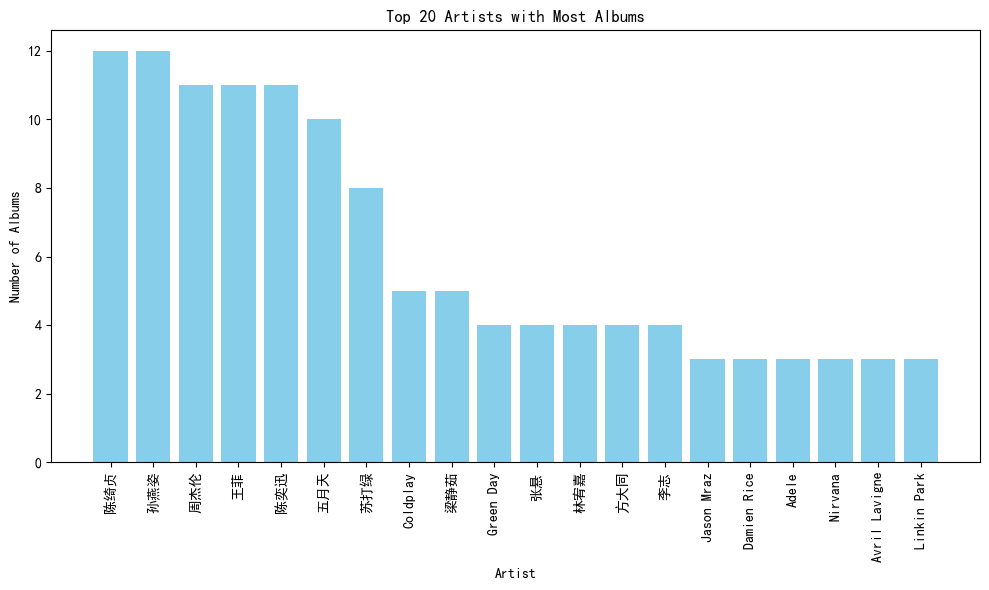

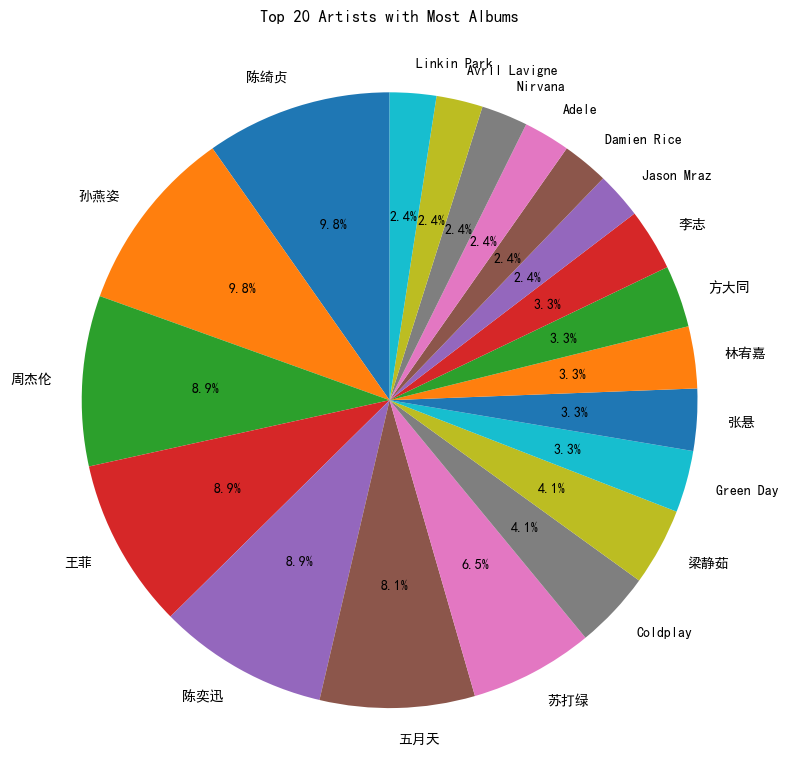

In [6]:
artist_counter = Counter(artists)

top_20_artists = artist_counter.most_common(20)
top_20_artists_names = [artist[0] for artist in top_20_artists]
top_20_artists_counts = [artist[1] for artist in top_20_artists]


plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(10, 6))
plt.bar(top_20_artists_names, top_20_artists_counts, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Albums')
plt.title('Top 20 Artists with Most Albums')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(top_20_artists_counts, labels=top_20_artists_names, autopct='%1.1f%%', startangle=90)
plt.title('Top 20 Artists with Most Albums')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Rating

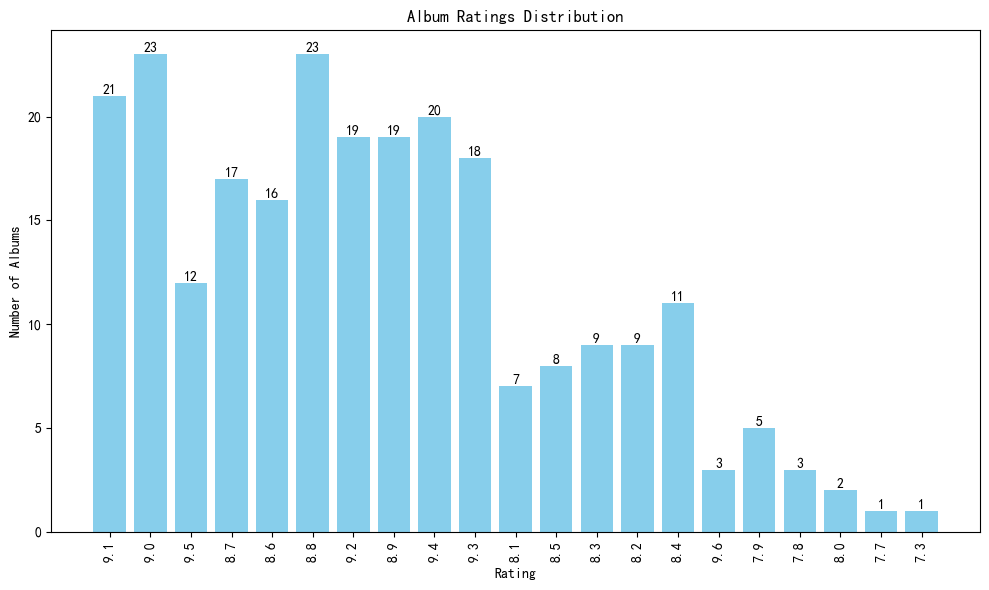

In [8]:
rating_counter = Counter(album_ratings)

ratings = list(rating_counter.keys())
counts = list(rating_counter.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(ratings)), counts, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Albums')
plt.title('Album Ratings Distribution')
plt.xticks(range(len(ratings)), ratings, rotation=90)
plt.tight_layout()

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

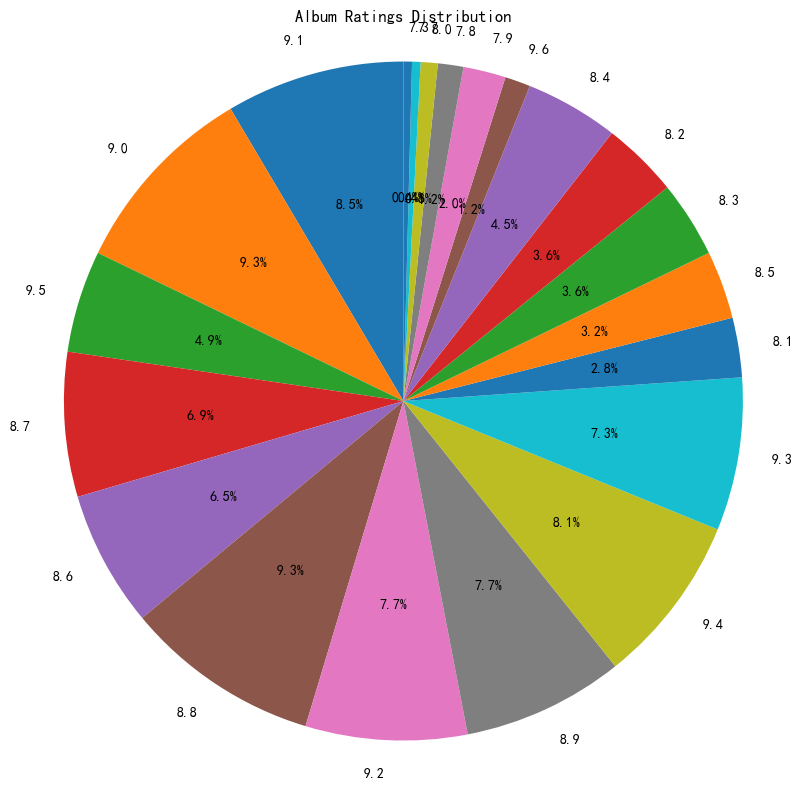

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Sort the ratings and corresponding album counts in descending order based on the rating.

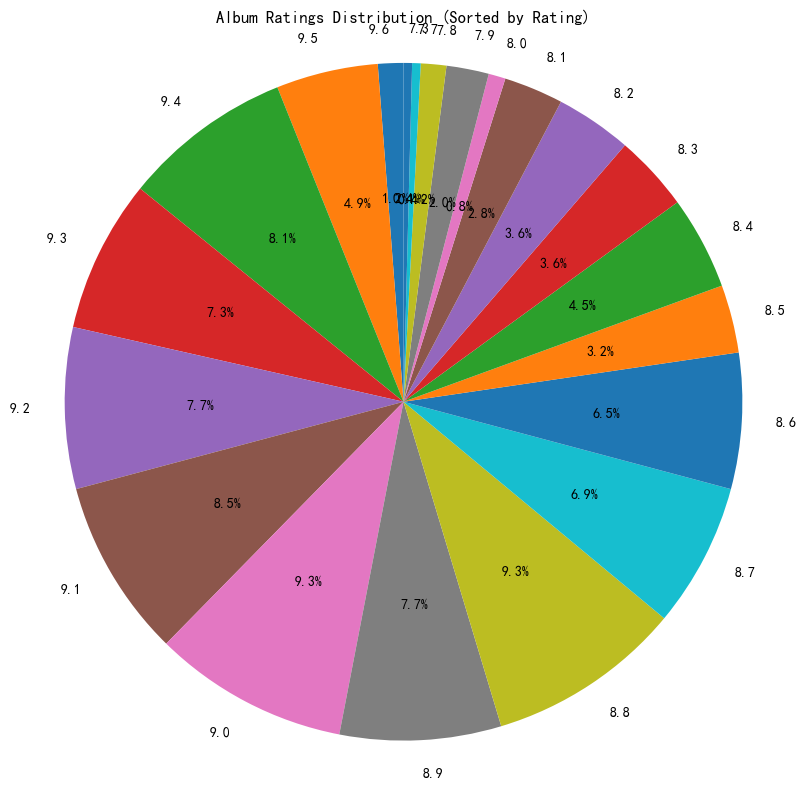

In [10]:

sorted_ratings = sorted(rating_counter.items(), key=lambda x: x[0], reverse=True)
sorted_counts = [item[1] for item in sorted_ratings]
sorted_ratings = [str(item[0]) for item in sorted_ratings]

plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution (Sorted by Rating)')
plt.axis('equal')
plt.tight_layout()
plt.show()

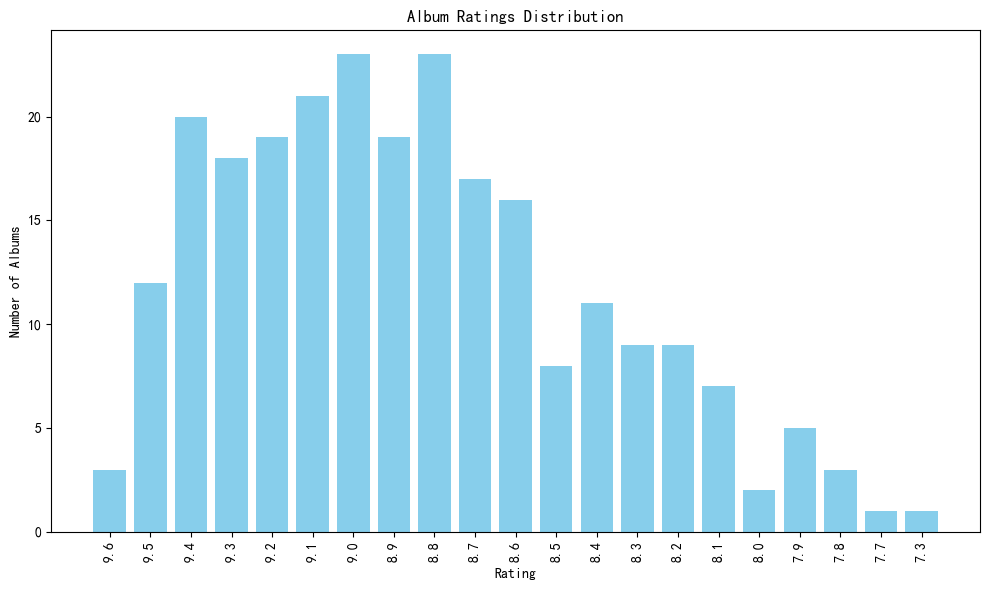

In [11]:
#bar_colors = ['skyblue', 'lightgreen', 'orange', 'lightpink', 'lightblue', 'yellow', 'lightgray']
bar_colors = ['skyblue']

plt.figure(figsize=(10, 6))
plt.bar(sorted_ratings, sorted_counts,color=bar_colors)
plt.xlabel('Rating')
plt.ylabel('Number of Albums')
plt.title('Album Ratings Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Sort the ratings and corresponding album counts in descending order based on the album count.

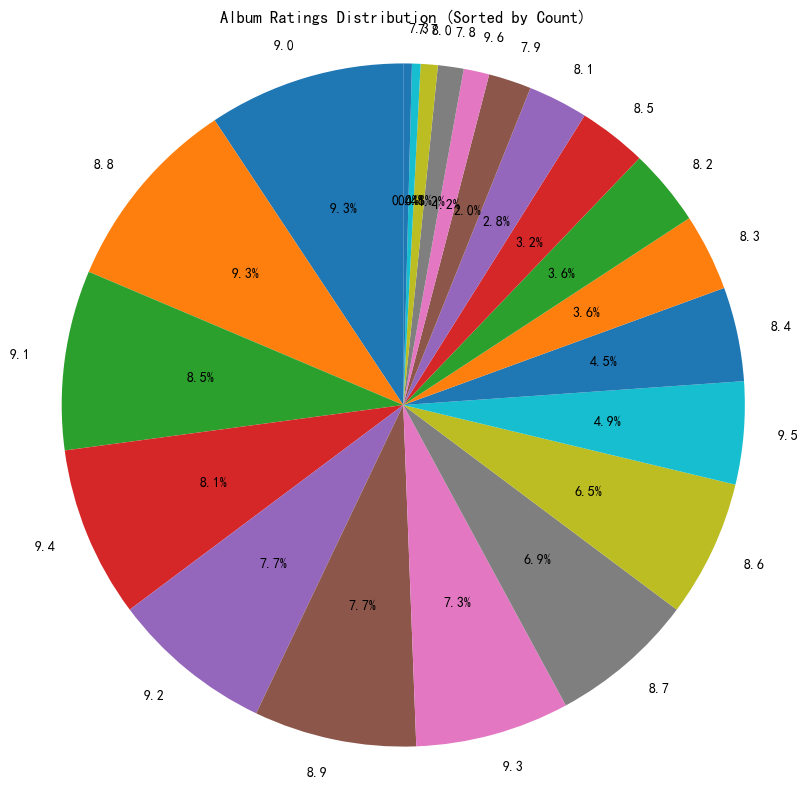

In [12]:
sorted_ratings = sorted(rating_counter.items(), key=lambda x: x[1], reverse=True)
sorted_counts = [item[1] for item in sorted_ratings]
sorted_ratings = [str(item[0]) for item in sorted_ratings]

plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution (Sorted by Count)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Release Date

In [13]:
print(release_dates)

['2008-05-13', '2008-06-17', '2005-09-23', '2001-09-14', '2008-10-23', '2011-03-08', '2008-09-23', '2008-01-11', '2004-02-02', '2009-01-22', '2007-05-22', '2004-08-24', '2004-09-21', '2007-07-06', '2007-11-02', '2007-07-20', '2009-05-22', '2003', '2005-06-13', '2003-07-31', '2004', '2011-01-24', '2006-06-09', '2000', '2011-11-11', '2009-10-30', '1991', '2002-07-19', '2000-11-13', '2000-07-10', '2000-12-7', '2000', '2002', '2005-11-01', '2008-12-19', '2006-10-20', '2009-08-19', '2003', '2010-11-12', '2003-03-25', '2004', '2005年9月', '2009-01-16', '2011-05-06', '2001-04-23', '2009-01-16', '2006', '2010-09-03', '2007-03-22', '1999-09-10', '2007-01-23', '2003-08-22', '2003-11-20', '2009-05-08', '2008-5-27', '2007-11-09', '2005', '1999-05-19', '2008-11-11', '2007-02-05', '2009-03-23', '2008-06-03', '2004-05-03', '2009-08-10', '2006-11-06', '2003', '2005年12月', '2007-01-11', '2009-08-11', '2006-09-05', '2001-07-09', '2005-10-07', '2006', '2002-08-09', '2004-05-12', '2004-10-1', '2008-08-19', '

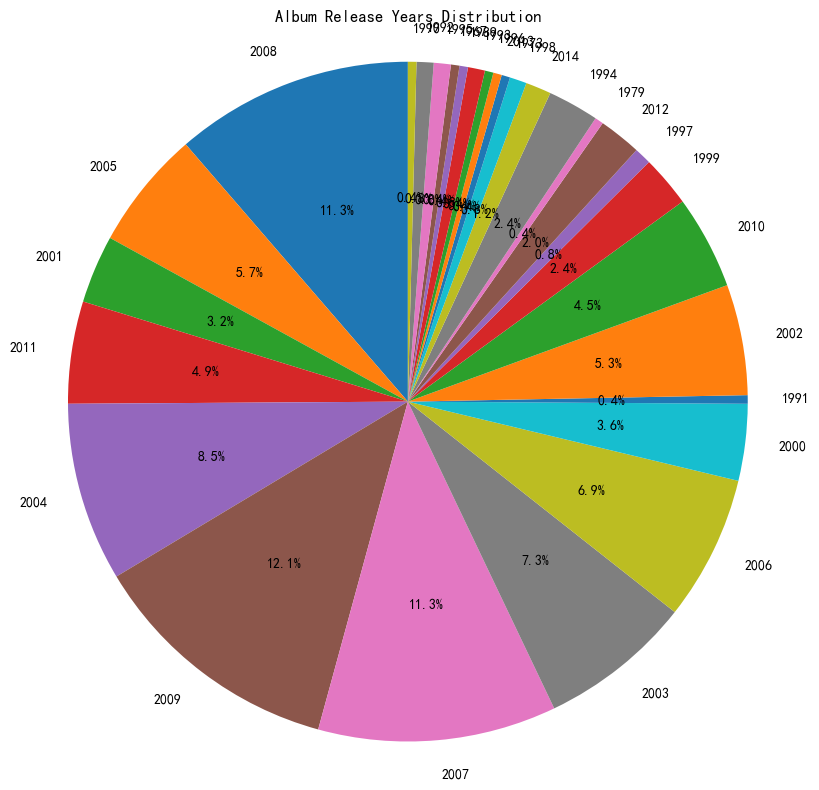

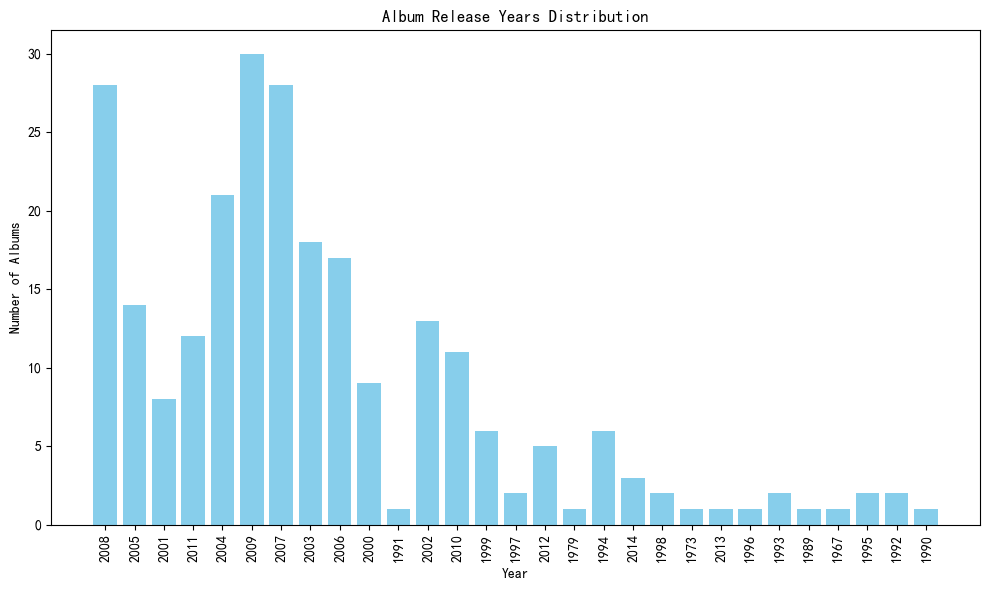

In [14]:

release_years = [date.split('-')[0] for date in release_dates]
release_years = [date.split('年')[0] for date in release_years]
release_years = [date.split('/')[0] for date in release_years]
for i in range(len(release_years)):
    date = release_years[i]
    if len(date.split(' ')) > 1:
        release_years[i] = date.split(' ')[2]


year_counter = Counter(release_years)


years = list(year_counter.keys())
counts = list(year_counter.values())


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=years, autopct='%1.1f%%', startangle=90)
plt.title('Album Release Years Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.title('Album Release Years Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Sorted by release year

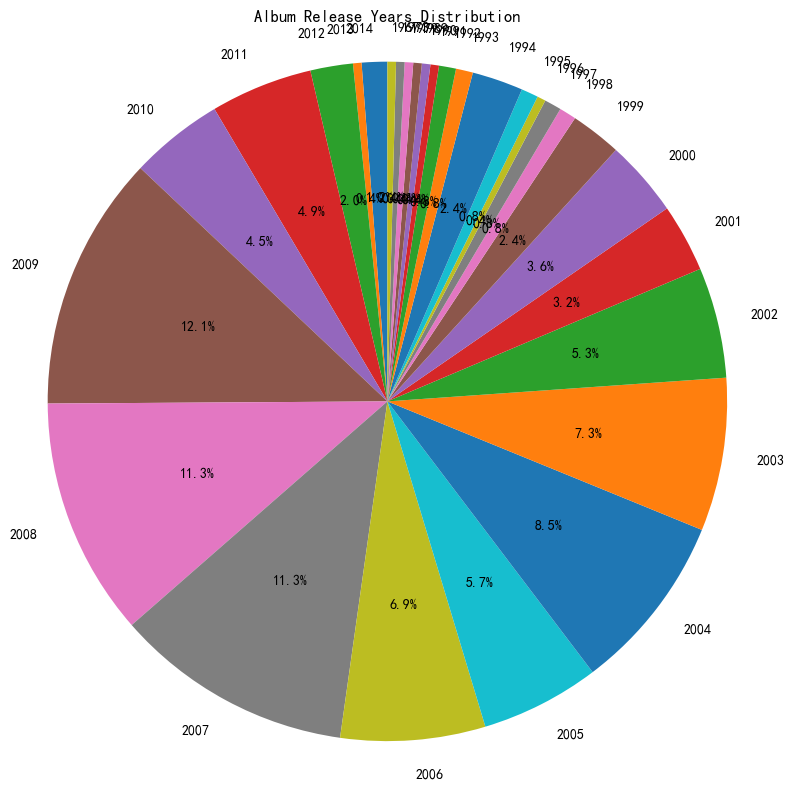

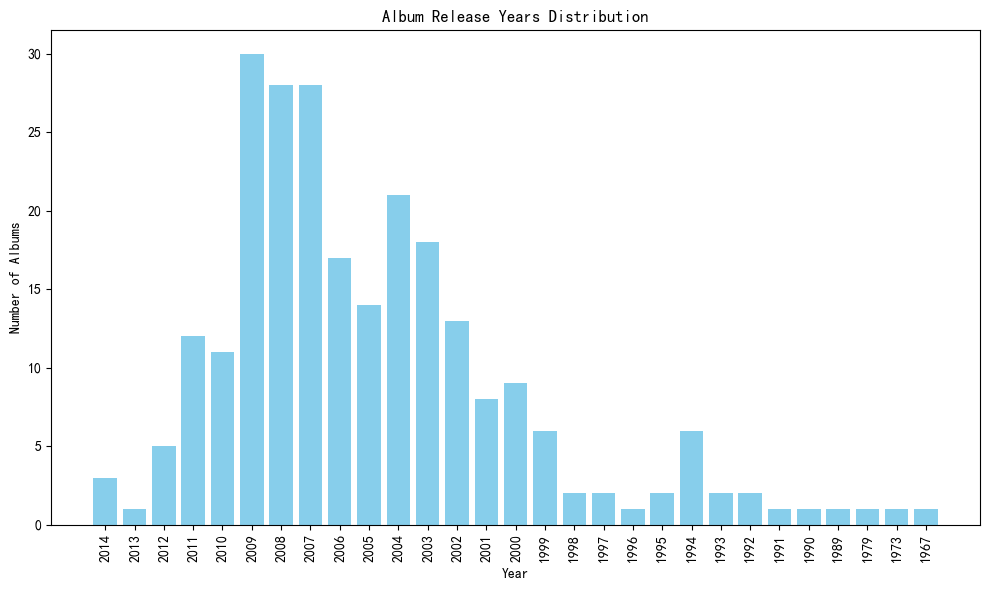

In [15]:
sorted_data = sorted(year_counter.items(), key=lambda x: x[0], reverse=True)
sorted_counts = [item[1] for item in sorted_data]
sorted_years = [str(item[0]) for item in sorted_data]

plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_years, autopct='%1.1f%%', startangle=90)
plt.title('Album Release Years Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(sorted_years, sorted_counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.title('Album Release Years Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()